# Quantum Data Encoding
In this notebook we will learn amplitude encoding for given classical dataset.

In this we will learn:
- What is **Quantum Data Encoding**
- Concept of **Amplitude Encoding**
- Encoding a **4D classical vector** using 2 qubits
- Manual state preparation using rotation gates
- Visualization and verfication using simulation

## Introduction
Quantum algorithm opeartes on **quantum state**, not classical data. Therefore ,classical information must be converted into quantum form before processing.
**Amplitude encoding** is a powerful technique where classical data value are stored. directly in the **probability amplitude** of a quantum state. Tgis method is widely used in **Quantum Machine Learning** because it allows encoding large datasets using very few qubits.

#### Amplitude Encoding
for a normalized classical vector:
$$
\vec{x}=[x_0,x_1,x_2,x_3]
$$
we prepare quantum state:
$$
|\psi\rangle = x_0|00\rangle+x_1|01\rangle+x_2|10\rangle+x_3|11\rangle
$$

Key observations
- vector size = 4 $ \rightarrow$ **2 qubits required**
- Vector must be **normalized**
- Amplitude are prepared using **rotation gates**

## Import required libraries

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

##  Step 1 - Define and normalize Classical Vector


In [3]:
# classical 4D vector
data = np.array([1,2,3,4],dtype=float)

# Normalize
norm=np.linalg.norm(data)
normalized_data=data/norm

print("Normalized vector:")
print(normalized_data)

Normalized vector:
[0.18257419 0.36514837 0.54772256 0.73029674]


## Step 2 - Compute Rotation Angles
we derive rotation angles that prepares the desired amplitudes.using **Ry gates** and **controlled opeartions**.

In [4]:
a0,a1,a2,a3=normalized_data

#calculate theta
theta1= 2*np.arccos(np.sqrt(a0**2 + a1**2))
theta2= 2*np.arccos(a0/np.sqrt(a0**2+a1**2))
theta3= 2*np.arccos(a2/np.sqrt(a2**2+a3**2))

print("Rotation angles(radians):")
print("\n theta1 =",theta1)
print("\n theta2 =",theta2)
print("\n theta3 =",theta3)

Rotation angles(radians):

 theta1 = 2.300523983021863

 theta2 = 2.214297435588181

 theta3 = 1.8545904360032246


## Step 3 - Construct the Quantum Circuit

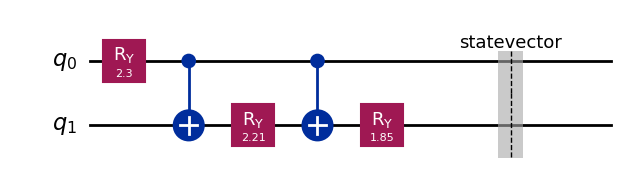

In [8]:
qc= QuantumCircuit(2)

# Amplitude encoding circuit
qc.ry(theta1,0)
qc.cx(0,1)
qc.ry(theta2,1)
qc.cx(0,1)
qc.ry(theta3,1)

qc.save_statevector()

#visualize circuit
qc.draw('mpl')

## Step 4 - Simulate Using AerSimulator

In [9]:
sim=AerSimulator(method='statevector')
job=sim.run(qc)
result=job.result()
statevector =result.get_statevector()
print("Quantum statevector:")
print(statevector)

Quantum statevector:
Statevector([-0.18257419+0.j,  0.89814624+0.j,  0.36514837+0.j,
             -0.16329932+0.j],
            dims=(2, 2))


## Step 5 - Visualize Amplitudes

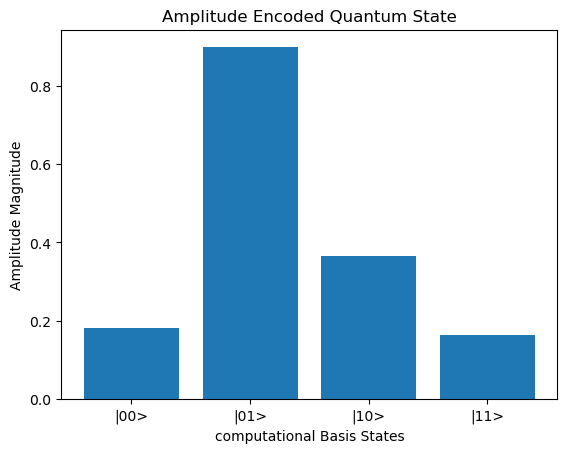

In [10]:
labels=['|00>','|01>','|10>','|11>']
amplitudes=np.abs(statevector)
plt.bar(labels,amplitudes)
plt.title("Amplitude Encoded Quantum State")
plt.ylabel("Amplitude Magnitude")
plt.xlabel("computational Basis States")
plt.show()

## plot probabilities

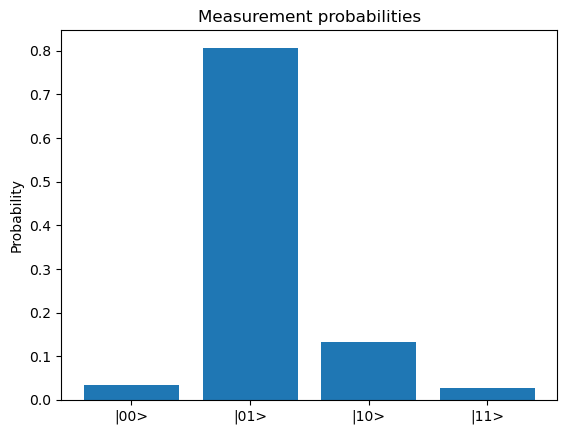

In [11]:
probabilities=np.abs(statevector)**2
plt.bar(['|00>','|01>','|10>','|11>'],probabilities)
plt.ylabel("Probability")
plt.title("Measurement probabilities")
plt.show()

## Result and Interpretation
- The classical vector[0,1,2,3] was **amplitude encoded** into a 2-qubit quantum state.
- The **Probability plot** shows how likely each basis stste is upon measurement: the higher the bar ,the larger the amplitude for state.
- The **highest bar |01>** means that , according to the encodig circuit , the uantum state has most of its amplitude concentrated in this basis state.
- This reflects the **relative weighting of the original classical data** in other words, the encoding was successful ,but approximate , so the exact amplitudes differ slighly from the normalized classical vector


so,in this notebook we were learned the Quantum data encoding for simple 4D vector.this basic technique used in QML algorithm to operate on large data using very few Qubits. Amplitude encoding is a foundational technique in quantum computing that enables efficient data representation and faster algorithms ,making it crucial for the next generation of quantum application.

**Author:** *Shreya Palase*  

**Date Created:**  *19-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day25_QuantumDataEncoding.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>